**IMPORT THE NECESSARY LIBRARIES**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT THE DATASET**

In [36]:
df = pd.read_csv('hearing_test.csv')

In [37]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


**PERFORM EXPLORATORY DATA ANALYSIS**

In [38]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [39]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [40]:
df['age'].value_counts()

48.0    180
46.0    179
49.0    174
47.0    169
50.0    165
       ... 
90.0      1
87.0      1
23.0      1
85.0      1
86.0      1
Name: age, Length: 69, dtype: int64

In [41]:
df['physical_score'].value_counts()

37.8    53
37.6    45
38.0    45
39.1    44
38.1    43
        ..
9.2      1
8.6      1
48.3     1
46.0     1
3.9      1
Name: physical_score, Length: 404, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

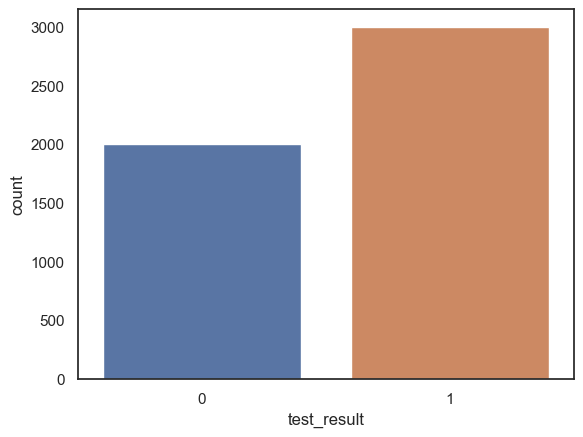

In [47]:
sns.set_style('white')
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

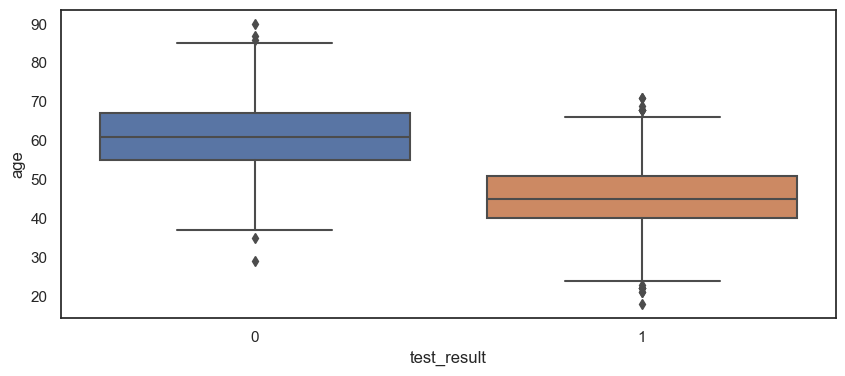

In [48]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='test_result',y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

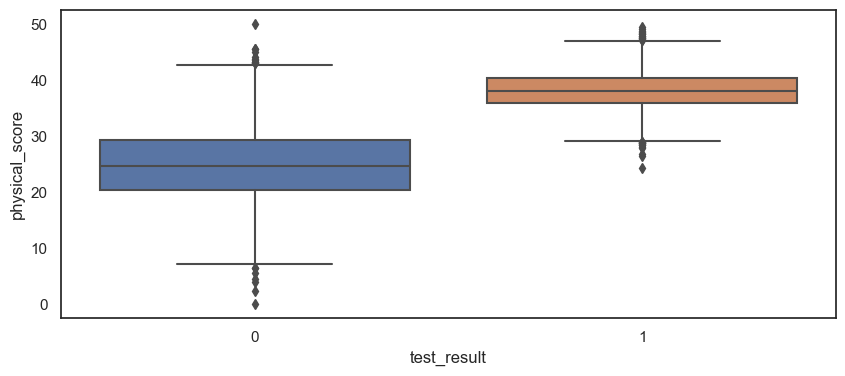

In [49]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='test_result',y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

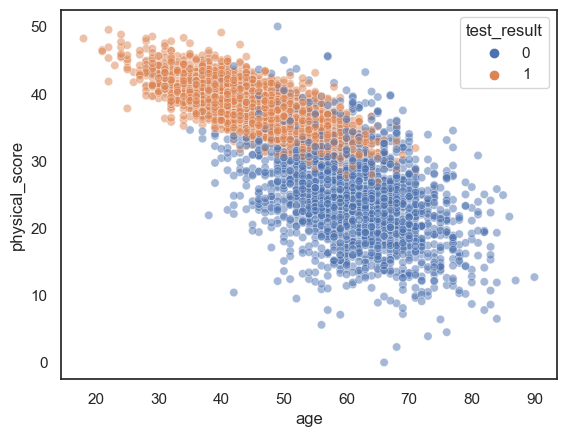

In [50]:
sns.scatterplot(data=df, x='age', y='physical_score',hue='test_result',alpha=0.5, legend='full')

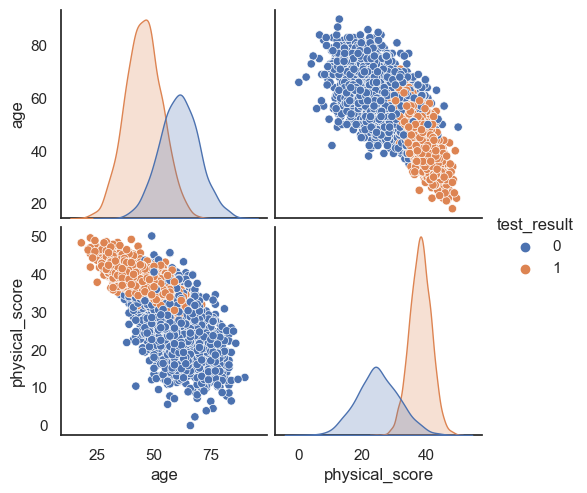

In [51]:
sns.pairplot(data=df, hue='test_result')

<Axes: >

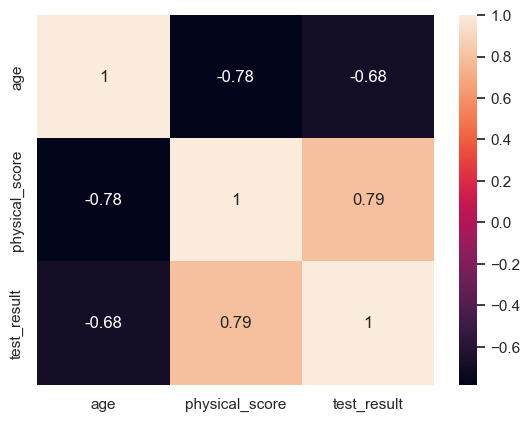

In [52]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

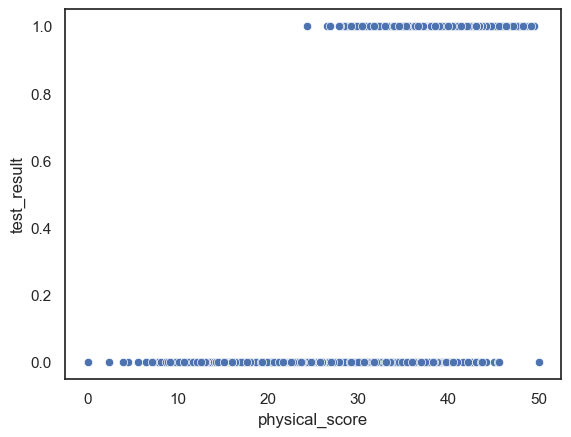

In [53]:
sns.scatterplot(data=df, x='physical_score',y='test_result')

<Axes: xlabel='age', ylabel='test_result'>

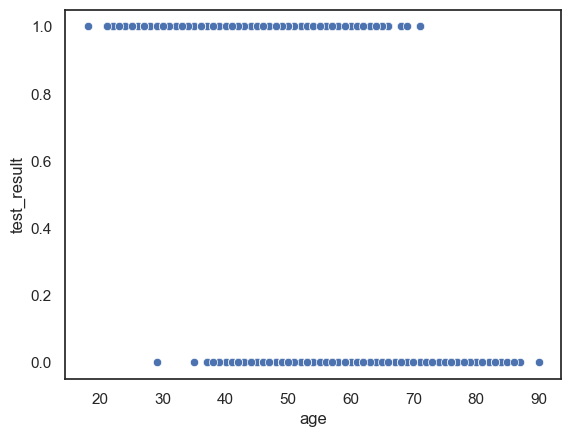

In [54]:
sns.scatterplot(data=df, x='age',y='test_result')

**3-D PLOT VISUALIZATION**

In [96]:
from mpl_toolkits.mplot3d import Axes3D 

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']);

**SEPERATE FEATURES AND LABELS**

In [57]:
X = df.drop('test_result', axis=1)

In [59]:
y = df['test_result']

**PERFORM TRAIN TEST SPLIT**

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

**SCALE THE DATA TO AVOID DATA LEAK**

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [63]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**CREATE THE LOGISTIC MODEL**

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

**FIT THE MODEL TO THE TRAIN DATA SET**

In [65]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

**OBTAIN THE COEFFICIENT OF THE MODEL**

In [66]:
model.coef_

array([[-0.91653034,  3.4506941 ]])

**PREDICT THE MODEL ON THE TEST DATA SET**

In [67]:
pred = model.predict(scaled_X_test)

In [68]:
pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

**OBTAIN THE ACCURACY SCORE AND CONFUSION MATRIX**

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [71]:
accuracy_score(y_test, pred)

0.9206666666666666

In [72]:
confusion_matrix(y_test, pred)

array([[515,  82],
       [ 37, 866]], dtype=int64)

**PLOT THE CONFUSION MATRIX**

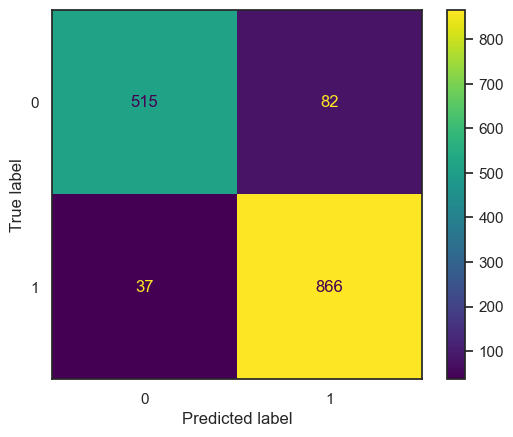

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

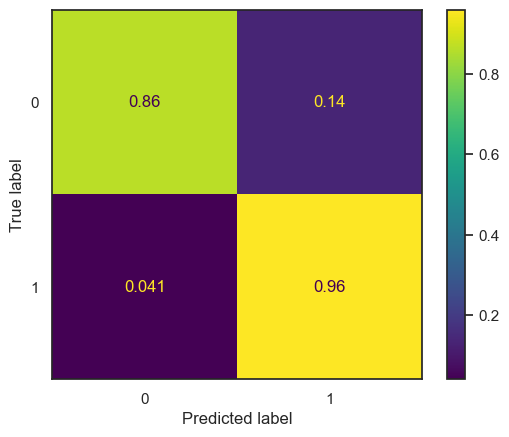

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize='true')

**PRINT THE CLASSIFICATION REPORT**

In [75]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



**EVALUATE THE CURVES AUC**

In [83]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay

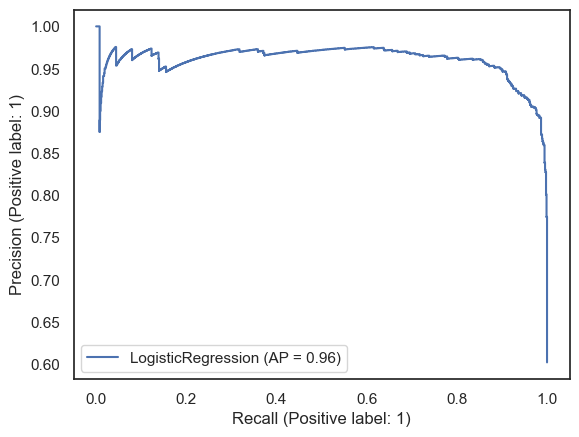

In [85]:
PrecisionRecallDisplay.from_estimator(model,scaled_X_test,y_test)

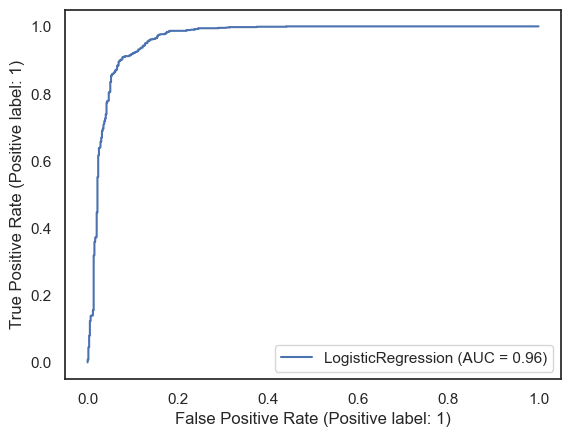

In [86]:
RocCurveDisplay.from_estimator(model,scaled_X_test,y_test)

**TEST WITH THE WHOLE DATASET**

In [87]:
X_train.iloc[0]

age               52.0
physical_score    27.3
Name: 2654, dtype: float64

In [88]:
y_train.iloc[0]

0

In [89]:
# 0% probability of 0 class
# 100% probability of 1 class
model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [90]:
model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

In [91]:
model.predict(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64